<a href="https://colab.research.google.com/github/ghrahul/ML-DL-PRACTICE/blob/master/CNN/using_eager_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [0]:
#set eager api
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [0]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [0]:
#weight and bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

#linear regression (Wx+b)
def linear_regression(inputs):
  return inputs * W +b

#mean square error
def mean_square_fn(model_fn, inputs, labels):
  return tf.reduce_sum(tf.pow(model_fn(inputs) - labels,2)) / (2 * n_samples)

In [0]:
#stochastic gradient optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

#compute gradients
grad = tfe.implicit_gradients(mean_square_fn)


Instructions for updating:
Colocations handled automatically by placer.
Initial cost= 9.521349907 W= -0.2907499 b= 0.020849988
Epoch: 0001 cost= 2.937587500 W= -0.0021114366 b= 0.062414654
Epoch: 0100 cost= 0.099893756 W= 0.33755055 b= 0.1896981
Epoch: 0200 cost= 0.094941117 W= 0.32772434 b= 0.2593616
Epoch: 0300 cost= 0.091056600 W= 0.31902197 b= 0.32105756
Epoch: 0400 cost= 0.088009782 W= 0.31131488 b= 0.37569734
Epoch: 0500 cost= 0.085620075 W= 0.30448925 b= 0.424088
Epoch: 0600 cost= 0.083745718 W= 0.29844427 b= 0.46694416
Epoch: 0700 cost= 0.082275577 W= 0.29309064 b= 0.50489885
Epoch: 0800 cost= 0.081122518 W= 0.2883494 b= 0.5385123
Epoch: 0900 cost= 0.080218114 W= 0.28415036 b= 0.5682814
Epoch: 1000 cost= 0.079508737 W= 0.28043157 b= 0.5946461


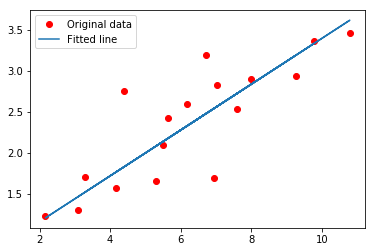

In [22]:
#Initial cost, before optimization
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()